<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/03_Regression_Metrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('placement.csv')

In [44]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

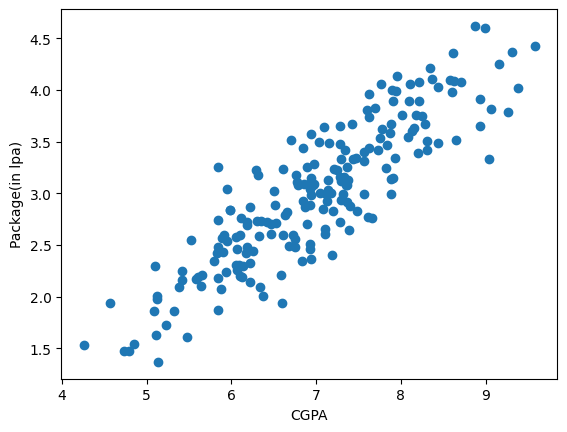

In [45]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [46]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [47]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

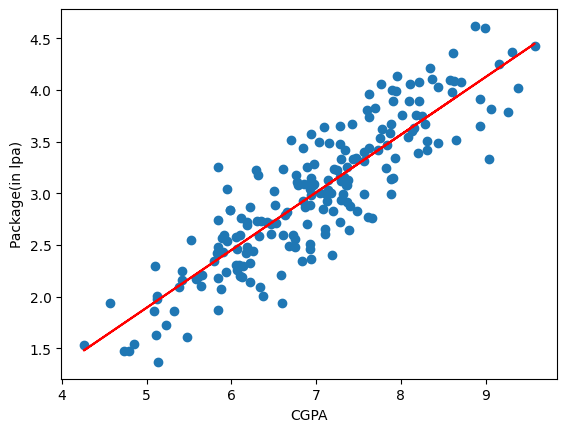

In [52]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
y_pred = lr.predict(X_test)

In [55]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [56]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [57]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [58]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [59]:
print("R2",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 0.780730147510384


In [60]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [61]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [62]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.548570,3.26
1,5.12,0.141246,1.98
2,7.82,0.040490,3.25
3,7.42,0.998462,3.67
4,6.94,0.712932,3.57


Text(0, 0.5, 'Package(in lpa)')

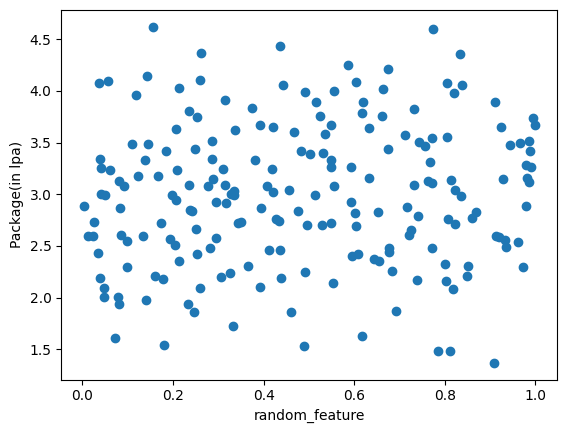

In [63]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [64]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(X_test)

In [69]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7790428833648191


In [70]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.767099255438593

In [71]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [72]:
new_df2.sample(5)

,cgpa,iq,package
173,6.75,3.46,2.56
31,8.10,3.99,3.89
165,8.21,3.48,4.08
126,5.91,2.60,2.60
69,7.30,4.04,2.94


Text(0, 0.5, 'Package(in lpa)')

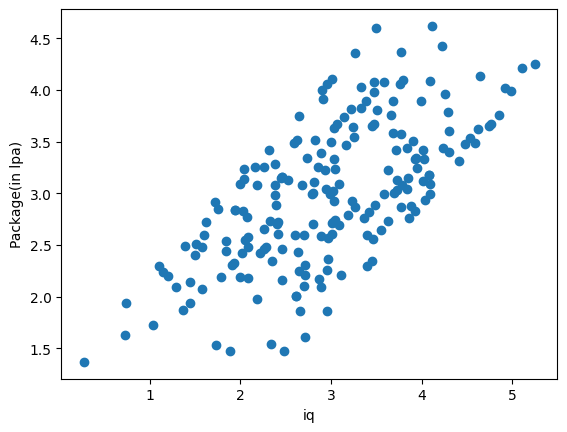

In [73]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [74]:
np.random.randint(-100,100)

-42

In [75]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [78]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.810064923613264


In [79]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7997981627274945